In [1]:
import os
from array import array
import numpy as np
from commpy.filters import rcosfilter
from commpy.filters import rrcosfilter
import matplotlib
import matplotlib.pyplot as plt
import ipympl
#%matplotlib inline
%matplotlib widget

In [2]:
def plot_signal_power(signal, figure_counter, title="Signal Power"):
    plt.figure(figure_counter)
    plt.cla()
    x_data = np.arange(0, len(signal))
    plt.plot(x_data, signal)
    plt.grid(1)
    plt.xlabel('time (samples)')
    plt.ylabel('Signal Power')
    plt.title(title)
    plt.show()

In [3]:
def gen_rrc_filter_impulse_response(n, f_sampl, t_symb, roll_off=0.24):
    assert (n % 2 == 1), "RRC filter length should be odd!"
    n += 1 # because first sample will be not used
    s_psf = rrcosfilter(n * f_sampl, roll_off, Ts=t_symb, Fs=f_sampl)[1][1:]
    return s_psf

In [4]:
def gen_rc_filter_impulse_response(n, f_sampl, t_symb, roll_off=0.24):
    assert (n % 2 == 1), "RC filter length should be odd!"
    n += 1 # because first sample will be not used
    s_psf = rcosfilter(n * f_sampl, roll_off, Ts=t_symb, Fs=f_sampl)[1][1:]
    return s_psf

In [5]:
def gen_qpsk_symbols(n_symb, fs):
    # create IQ of QPSK
    # complex array: [(1 + 1j, 1 -1j, ..., -1 -1j)]
    data = np.random.randint(0, 4, n_symb)
    #print(len(data))
    #x_tr = x.transpose()
    y = [-1 - 1j, -1 + 1j, 1 - 1j, 1 + 1j]
    iq = [y[val] for val in data]
    iq_ups = np.zeros(n_symb * fs, dtype=complex)
    iq_ups[:len(iq) * fs:fs] = iq
    return iq_ups

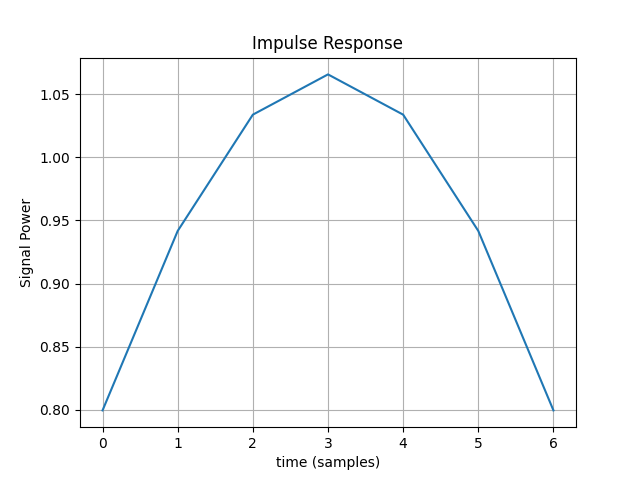

[ 1.-1.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+1.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]


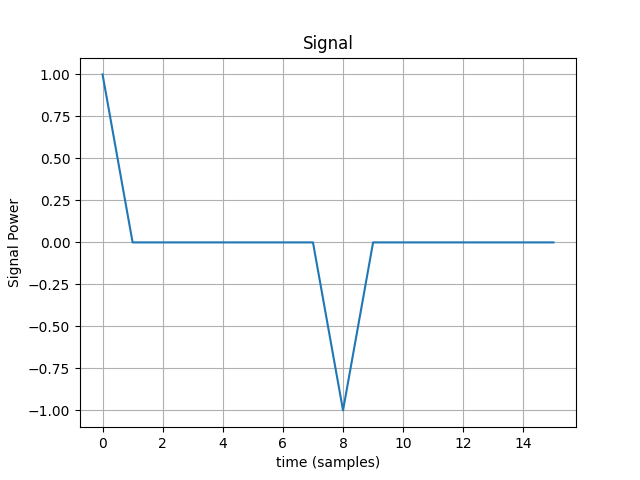

[ 1.06557749-1.06557749j  1.03371187-1.03371187j  0.94166682-0.94166682j
  0.79961195-0.79961195j  0.        +0.j         -0.79961195+0.79961195j
 -0.94166682+0.94166682j -1.03371187+1.03371187j -1.06557749+1.06557749j
 -1.03371187+1.03371187j -0.94166682+0.94166682j -0.79961195+0.79961195j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j        ]


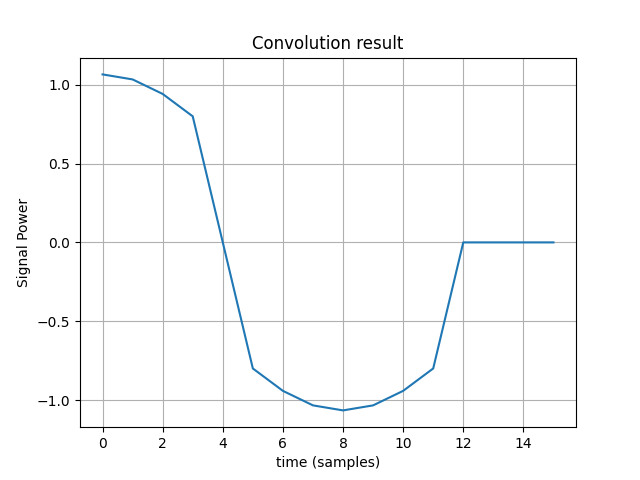

In [6]:
N = 7
Fs = 1
T_symb = 8#1 / sig_board
s_rc = gen_rrc_filter_impulse_response(N, Fs, T_symb)
plot_signal_power(s_rc, 0, "Impulse Response")

N_symb = 2
sps = 8 # f_sampling / f_symbol (SPS)
s_qpsk = gen_qpsk_symbols(N_symb, sps)
print(s_qpsk)
plot_signal_power(s_qpsk.real, 1, "Signal")

qpsk_rc = np.convolve(s_qpsk, s_rc, 'same')
print(qpsk_rc)
plot_signal_power(qpsk_rc.real, 2, "Convolution result")